In [1]:
# DATA TEST

In [2]:
from netCDF4 import Dataset

nc = Dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc') # Copernicus (0.1°x0.1°)

type(nc)

netCDF4._netCDF4.Dataset

In [3]:
for i in nc.variables:
    print('{} : {}'.format(nc.variables[i].name, nc.variables[i].datatype))

lat : float32
lon : float32
time : float32
agl : float32


In [4]:
import xarray as xr

ncxr = xr.open_dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc') # Copernicus (0.1°x0.1°)

ncxr

<xarray.Dataset>
Dimensions:  (lat: 1800, lon: 3600, time: 252)
Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.95 -179.85 -179.75 ... 179.75 179.85 179.95
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2020-12-15
Data variables:
    agl      (time, lat, lon) float32 ...
Attributes:
    Conventions:        CF-1.6
    projection:         latlon
    authors:            N.Elguindi and C.Granier
    description:        Monthly emissions from CAMS-GLOB-ANT_v4.2 nh3 emissio...
    product_version:    v4.2
    title:              CAMS Global anthropogenic emissions
    institution:        Laboratoire d'Aérologie/CNRS 
    source:             EDGARv4.3.2 emissions up to 2010 and CEDS emissions u...
    references:         Granier, C., S. Darras, H. Denier van der Gon, J. Dou...
    distribution_date:  2020-11-19
    history:            lun. 29 juin 2020 18:42: Process from monthly to mont...

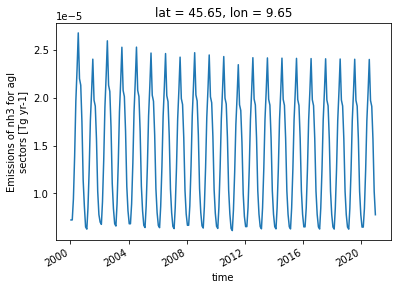

In [5]:
agl = ncxr['agl']

dsloc = ncxr.sel(lon=9.60,lat=45.69,method='nearest')
dsloc['agl'].plot()

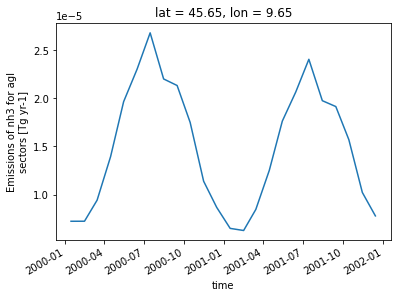

In [6]:
dsloc = ncxr.sel(lon=9.65,lat=45.69,method='nearest')
dsloc['agl'][0:24].plot()

<AxesSubplot:>

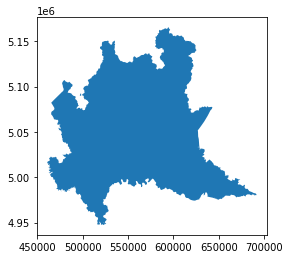

In [7]:
import geopandas as gpd

regione = gpd.read_file('../resources/regione/regione_2015.shp')
regione.plot()

<AxesSubplot:>

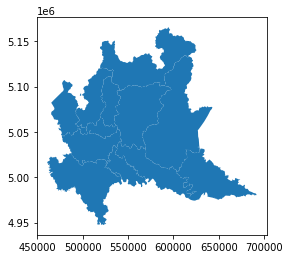

In [8]:
province = gpd.read_file('../resources/province/province_2015.shp')
province.plot()

In [9]:
print(regione.columns)
print(regione.crs)

Index(['CODICE', 'NOME', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'], dtype='object')
epsg:32632


In [10]:
df_wgs84 = regione.to_crs({'init': 'epsg:4326'}) 
df_wgs84.head(2)

,CODICE,NOME,SHAPE_AREA,SHAPE_LEN,geometry
0,03,REGIONE LOMBARDIA,2.386795e+10,1.535219e+06,"MULTIPOLYGON (((8.49841 45.29189, 8.49852 45.2..."


<AxesSubplot:>

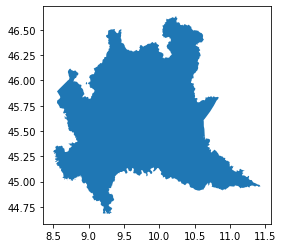

In [11]:
df_wgs84.plot()